In [16]:
import subprocess

subprocess.run(['python', '-m', 'GenerateStats.gen_stats'])

Running Simulation with task distribution estimation...
Saving stats in stats_with_learning.csv...
Running Simulation with fixed task distribution...
Saving stats in stats_without_learning.csv...


CompletedProcess(args=['python', '-m', 'GenerateStats.gen_stats'], returncode=0)

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

df_learning = pd.read_csv("stats_with_learning.csv")
print(df_learning)

df = pd.read_csv("stats_without_learning.csv")
print(df)

     time  costs  serv_times   runtimes  number_of_tasks
0       0     80           0   1.535507               80
1       1    120           0   1.535619               80
2       2    160           0   1.535725               80
3       3    200           0   1.535830               80
4       4    240           0   1.535939               80
..    ...    ...         ...        ...              ...
487   487  19560          62  23.864767               80
488   488  19600          62  23.943701               80
489   489  19640          62  23.964800               80
490   490  19680          62  23.999109               80
491   491  19720         127  24.084291               80

[492 rows x 5 columns]
     time  costs  serv_times   runtimes  number_of_tasks
0       0     80           0   2.051788               80
1       1    120           0   2.051897               80
2       2    160           0   2.052000               80
3       3    200           0   2.052108               80
4      

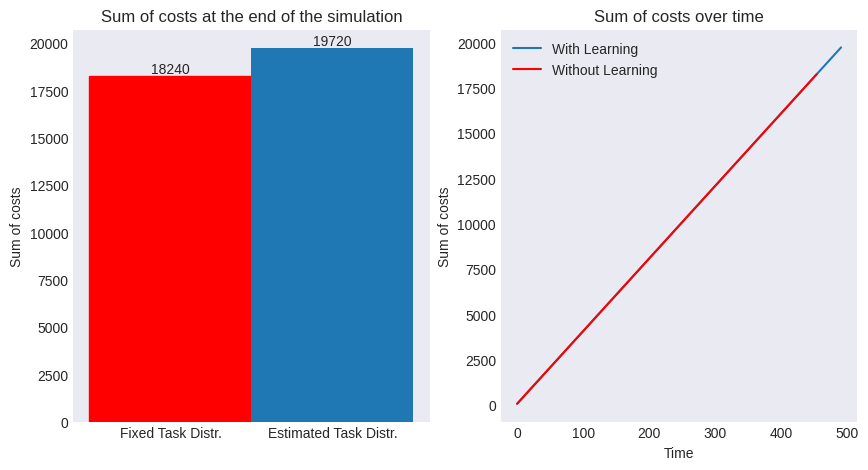

In [18]:
cost = df["costs"].iloc[-1]
cost_learning = df_learning["costs"].iloc[-1]

plt.style.use('seaborn-v0_8-dark')
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

bars = ax[0].bar([0, 1], [cost, cost_learning], width=1, align='center')
ax[0].bar_label(bars, labels=[cost, cost_learning])
ax[0].set_xticks([0, 1], labels=['Fixed Task Distr.', 'Estimated Task Distr.'])
ax[0].set_title("Sum of costs at the end of the simulation")
ax[0].set_ylabel("Sum of costs")
bars[0].set_color('r')

ax[1].plot(df_learning["time"], df_learning["costs"], label="With Learning")
ax[1].plot(df["time"], df["costs"], label="Without Learning", color="r")
ax[1].set_title("Sum of costs over time")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Sum of costs")

ax[1].legend()

plt.show()

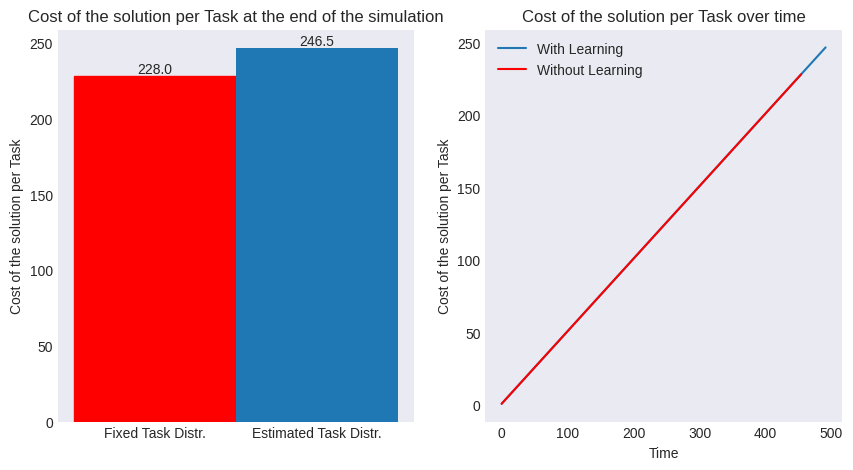

In [21]:
costs_per_task = df['costs'].apply(lambda x: x / df['number_of_tasks'].iloc[0])
costs_per_task_learning  = df_learning['costs'].apply(lambda x: x / df_learning['number_of_tasks'].iloc[0])

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

bars = ax[0].bar([0, 1], [costs_per_task.iloc[-1], costs_per_task_learning.iloc[-1]], width=1, align='center')
ax[0].bar_label(bars, labels=[costs_per_task.iloc[-1], costs_per_task_learning.iloc[-1]])
ax[0].set_xticks([0, 1], labels=['Fixed Task Distr.', 'Estimated Task Distr.'])
ax[0].set_title("Cost of the solution per Task at the end of the simulation")
ax[0].set_ylabel("Cost of the solution per Task")
bars[0].set_color('r')

ax[1].plot(df_learning["time"], costs_per_task_learning, label="With Learning")
ax[1].plot(df["time"], costs_per_task, label="Without Learning", color="r")
ax[1].set_title("Cost of the solution per Task over time")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Cost of the solution per Task")

ax[1].legend()

plt.show()

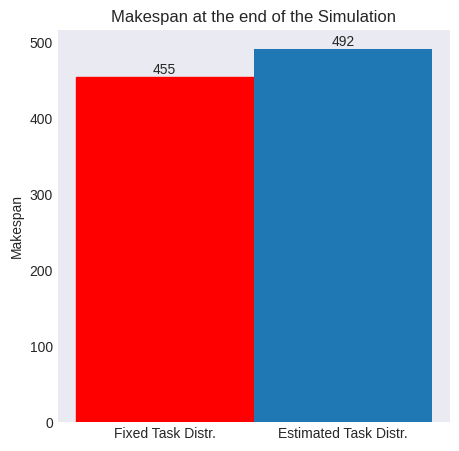

In [23]:
makespan = df["time"].iloc[-1] + 1
makespan_learning = df_learning["time"].iloc[-1] + 1

plt.figure(figsize=(4, 4))

bars = plt.bar([0, 1], [makespan, makespan_learning], width=1, align='center')
plt.bar_label(bars, labels=[makespan, makespan_learning])
plt.xticks([0, 1], labels=['Fixed Task Distr.', 'Estimated Task Distr.'])
bars[0].set_color('r')
plt.title("Makespan at the end of the Simulation")
plt.ylabel("Makespan")

plt.show()

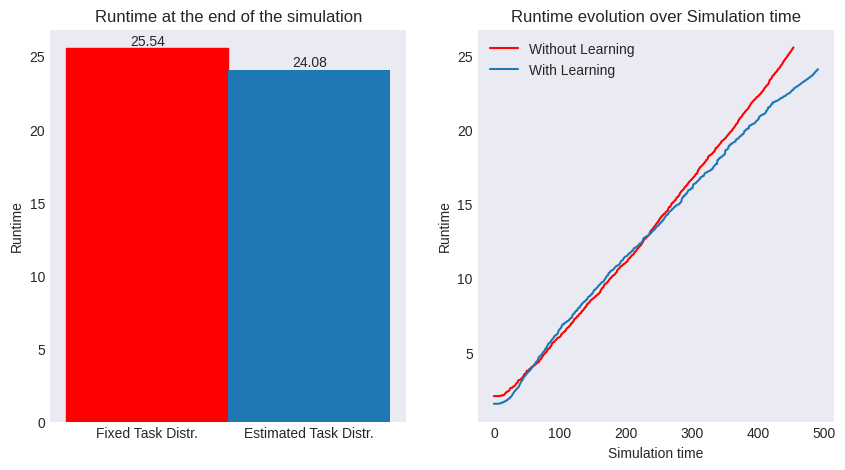

In [32]:
runtime = df["runtimes"].iloc[-1]
runtime_learning = df_learning["runtimes"].iloc[-1]

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

bars = ax[0].bar([0, 1], [runtime, runtime_learning], width=1, align='center')
ax[0].bar_label(bars, labels=["{:.2f}".format(runtime), "{:.2f}".format(runtime_learning)])
bars[0].set_color('r')
ax[0].set_title("Runtime at the end of the simulation")
ax[0].set_ylabel("Runtime")
ax[0].set_xticks([0, 1], labels=['Fixed Task Distr.', 'Estimated Task Distr.'])

ax[1].plot(df["time"], df["runtimes"], label="Without Learning", color="r")
ax[1].plot(df_learning["time"], df_learning["runtimes"], label="With Learning")
ax[1].set_title("Runtime evolution over Simulation time")
ax[1].set_xlabel('Simulation time')
ax[1].set_ylabel("Runtime")

ax[1].legend()

plt.show()

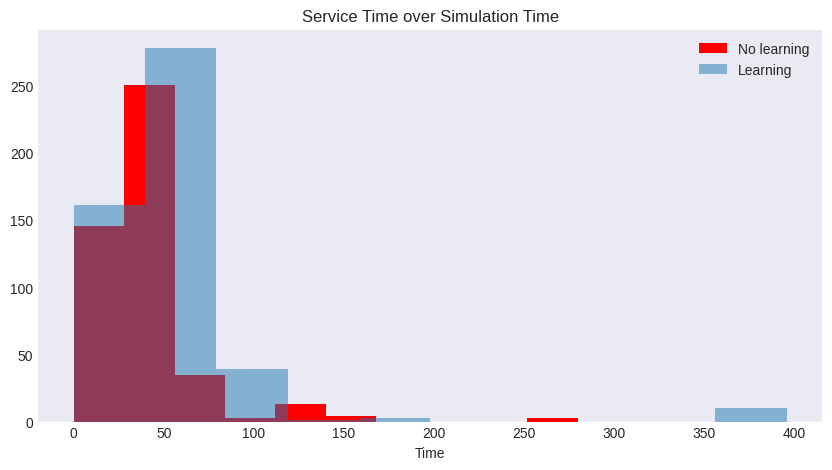

In [36]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))


ax.hist(df["serv_times"], label="No learning", color="r")
ax.hist(df_learning["serv_times"], alpha=0.5, label="Learning")
ax.set_xlabel('Service Time')
ax.set_xlabel('Time')
ax.set_title('Service Time over Simulation Time')

ax.legend()

plt.show()